In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rng = np.random.default_rng()

In [8]:
N = 10000
C = 2
N_T = 20
DT = 1.0
DIM = 2
A = np.linalg.inv(np.array([[5, 4],
                            [4, 5]]))
# A = np.array([[1, 1, 1],
#               [1, 2, 1],
#               [1, 1, 2]])

In [9]:
def s(x):
    return x @ A @ x.T / 2

In [10]:
def dsdx(x):
    return A @ x.T

In [11]:
def h(x, p):
    return s(x) + p.T @ p / 2

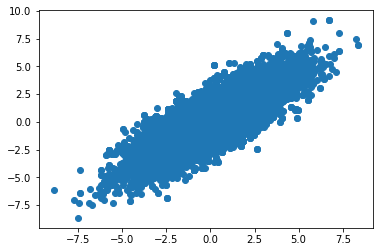

In [12]:
samples = []
update_cnt = 0
x = np.array([0, 0])

for _ in range(N):
    tmp_p = rng.normal(size=2)
    h_init = h(x, tmp_p)
    
    tmp_x = x + tmp_p * DT / 2
    for _ in range(N_T - 1):
        tmp_p = tmp_p - dsdx(tmp_x) * DT
        tmp_x = tmp_x + tmp_p * DT
    tmp_p = tmp_p - dsdx(tmp_x) * DT
    tmp_x = tmp_x + tmp_p * DT / 2
    
    h_fin = h(tmp_x, tmp_p)
    
    if rng.random() < np.exp(h_init - h_fin):
        x = tmp_x
    samples.append(x)
    
samples = np.array(samples)
plt.scatter(samples[:, 0], samples[:, 1])

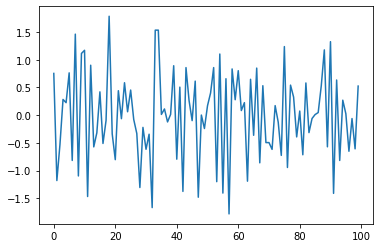

In [32]:
plt.plot(samples)